<h1 style="text-align: center;"> TC3006C: Inteligencia artificial avanzada para la ciencia de datos I</h1>
<p></p>
<div style="text-align: center;"> <em>Detection and treatment of outliers</em> </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading data

url = 'https://drive.google.com/file/d/14cl3aR2tkp3BzpUQqpeDZ7j6X9MEQFX7/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

main_cols = ['Calories','Carbohydrates','Total_Fat','Protein','Sodium','Sugars']

tmp = pd.read_csv(dwn_url)
tmp = tmp.rename(columns={'Total Fat':'Total_Fat'})

tmp[main_cols].head(2)

,Calories,Carbohydrates,Total_Fat,Protein,Sodium,Sugars
0,300,31,13.0,17,750,3
1,250,30,8.0,18,770,3


In [ ]:
tmp.describe()

,Calories,Calories from Fat,Total_Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


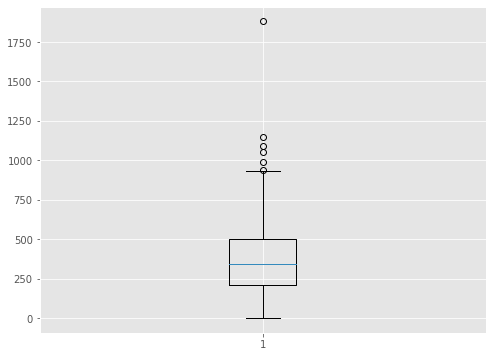

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8,6))
ax.boxplot(tmp['Calories'])
plt.show()

## Outiers detection and treatment (univariate view)

Values outside of the interval $[P_{25}-1.5\cdot\mathrm{IQR}, P_{75}+1.5\cdot\mathrm{IQR}]$, where $\mathrm{IQR} = P_{75} - P_{25}$ can be considered as outliers

In [ ]:
factor = 1.5
bounds = {}

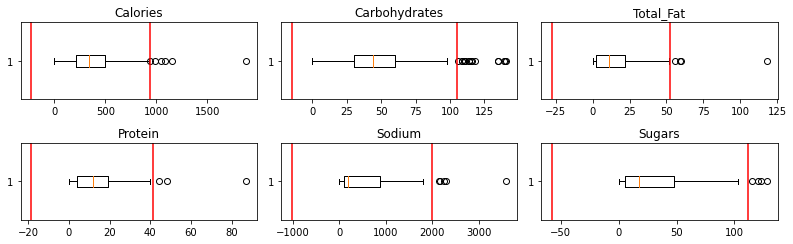

In [ ]:
fig = plt.figure(figsize=(11,3.5))

for i,col in enumerate(main_cols):
    p25 = np.percentile(tmp[col], 25)
    p75 = np.percentile(tmp[col], 75)
    ri  = p75 - p25 
    
    lb = p25-(factor*ri)
    up = p75+(factor*ri)
    
    bounds.update({col:[lb,up]})
    
    fig.add_subplot(2,3,i+1)
    plt.boxplot(tmp[col],vert=False)
    plt.axvline(lb,color='red')
    plt.axvline(up,color='red')
    plt.title(col)

plt.tight_layout()
plt.show()

**Remediation 1: Truncate values**

In [ ]:
df = tmp.copy()
for col in main_cols:
    df.loc[df[col]>=bounds[col][1], col] = bounds[col][1]

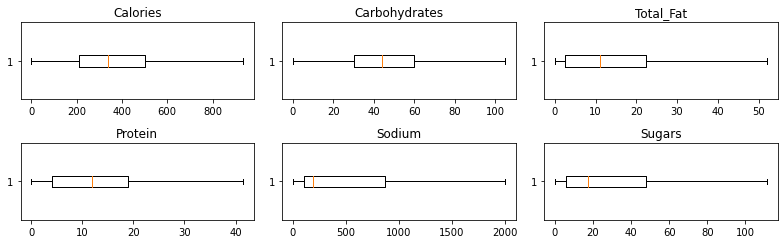

In [ ]:
fig = plt.figure(figsize=(11,3.5))

for i,col in enumerate(main_cols):
    fig.add_subplot(2,3,i+1)
    plt.boxplot(df[col],vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()

**Remediation 2: Remove points**

In [ ]:
df = tmp.copy()

for col in ['Carbohydrates','Total_Fat','Protein','Sodium','Sugars','Calories']:
    df = df[df[col].between(bounds[col][0], bounds[col][1])]

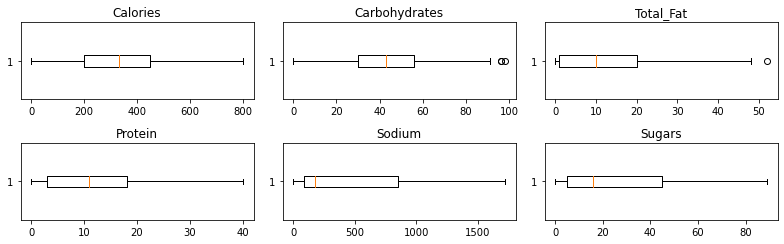

In [ ]:
fig = plt.figure(figsize=(11,3.5))

for i,col in enumerate(main_cols):
    fig.add_subplot(2,3,i+1)
    plt.boxplot(df[col],vert=False)
    plt.title(col)

plt.tight_layout()
plt.show()